<p style="text-align: center; font-size: 40px">به نام خدا</p>
<p style="text-align: center; font-size: 30px">فاز دوم تمرین کامپیوتری شماره 5</p>
<p style="text-align: center; font-size: 30px">علی مهرانی - 810198542</p>

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# Section 0
Data loading

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## showing dataset classes image

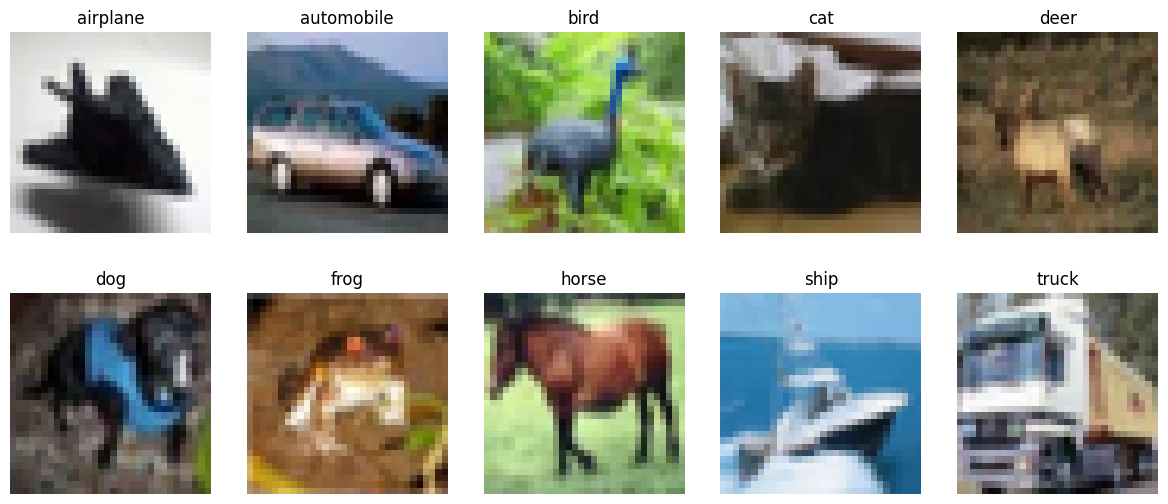

In [4]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Find the first image of the current class in the training set
    index = np.where(y_train == i)[0][0]
    # Display the image
    ax.imshow(x_train[index])
    ax.set_title(class_names[i])
    ax.axis('off')
    
plt.show()

## Showing test/train data distibution

### train

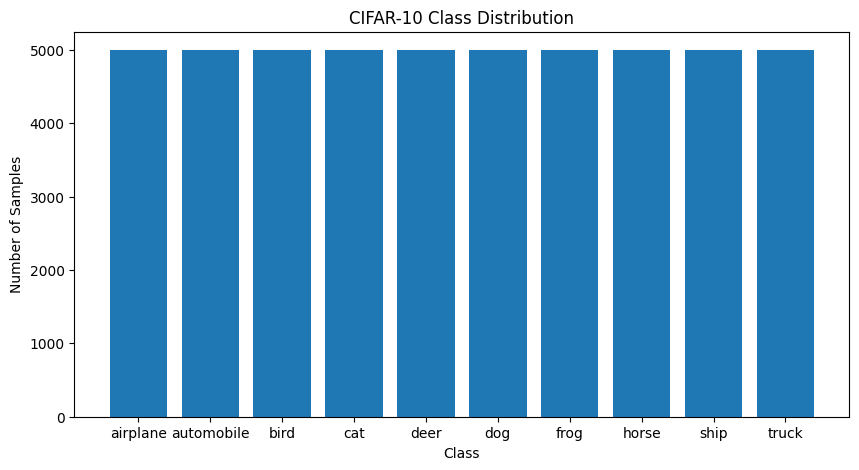

In [16]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

### test

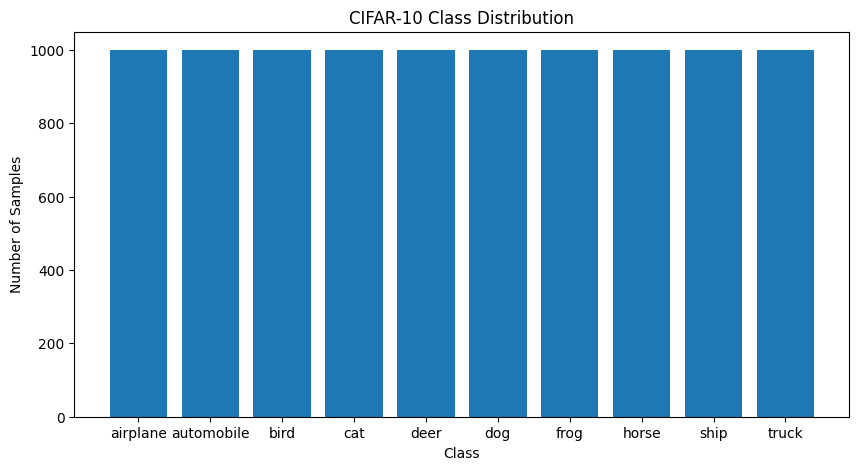

In [14]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

## Normalization

Since we're giving our images to the CNN, their shape must be matched to what our model expects, so we reshape our iamges to (32 X 32 X 3) RGB images and normalize it's pixel values to be in the range of (0,1). 

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train=x_train / 255.0
x_test=x_test / 255.0

## Label Encoding

We use One Hot encoding here to apply label encoding for 'categorial values'.

In [17]:
classes_num = 10
y_train = tf.keras.utils.to_categorical(y_train, classes_num)
y_test  = tf.keras.utils.to_categorical(y_test , classes_num)

Let's test it.

In [18]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Let's see some images again.

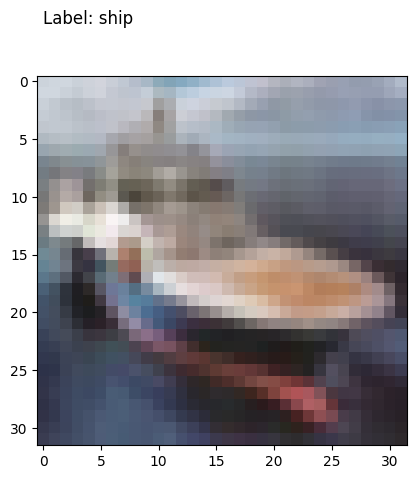

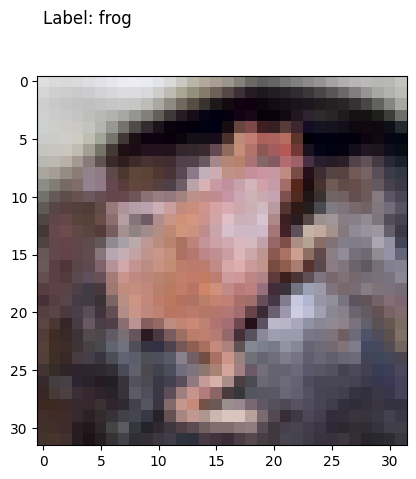

In [34]:
import random
rand_train = random.randint(0, 49999)
rand_test  = random.randint(0, 9999)

plt.imshow(x_train[rand_train])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_train[rand_train])]}", fontsize=12, color="black")
plt.show()

plt.imshow(x_test[rand_test])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_test[rand_test])]}", fontsize=12, color="black")
plt.show()